<a href="https://colab.research.google.com/github/yiwenwangANU/Tensorflow_Certificate/blob/main/Tensorflow_Certificate_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-07-17 05:21:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-17 05:21:08 (118 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 
unzip_data("10_food_classes_10_percent.zip")

--2022-07-17 05:21:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 173.194.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   217MB/s    in 0.7s    

2022-07-17 05:21:09 (217 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [5]:
train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'
IMG_SIZE = (224, 224)

In [6]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                    image_size=IMG_SIZE,
                                                                    label_mode="categorical", 
                                                                    batch_size=32)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                   image_size=IMG_SIZE,
                                                                   label_mode="categorical", 
                                                                   batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
class_names = train_dataset.class_names

In [8]:
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

In [9]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

#Model

In [10]:
# base_model = tf.keras.applications.MobileNet(include_top=False)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

16719872/16705208 [==============================] - 0s 0us/step


In [11]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [12]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")

In [ ]:
# inputs = layers.Input(shape=IMG_SIZE+ (3,))
# # x = tf.keras.layers.Rescaling(scale=1./255)(inputs)
# x = data_augmentation(inputs)
# x = base_model(x)
# # x = layers.Dropout(0.2)(x)
# x = layers.GlobalAveragePooling2D()(x)
# outputs = layers.Dense(units=len(class_names), activation='softmax')(x)

# model = tf.keras.Model(inputs, outputs)

In [13]:
model = tf.keras.Sequential([
  tf.keras.Input(shape=IMG_SIZE + (3,)),
  data_augmentation,
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(units=len(class_names), activation='softmax')                            
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [15]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
initial_epochs = 5

history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset,
                    validation_steps=int(0.1*len(test_dataset)),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True),
                               tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, verbose=1)])

Epoch 1/5
24/24 [==============================] - 23s 255ms/step - loss: 2.0090 - accuracy: 0.3133 - val_loss: 1.4754 - val_accuracy: 0.6429 - lr: 0.0010
Epoch 2/5
24/24 [==============================] - 5s 173ms/step - loss: 1.3958 - accuracy: 0.6587 - val_loss: 1.0958 - val_accuracy: 0.7411 - lr: 0.0010
Epoch 3/5
24/24 [==============================] - 4s 156ms/step - loss: 1.0961 - accuracy: 0.7453 - val_loss: 0.8717 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 4/5
24/24 [==============================] - 5s 179ms/step - loss: 0.9406 - accuracy: 0.7747 - val_loss: 0.7500 - val_accuracy: 0.7991 - lr: 0.0010
Epoch 5/5
24/24 [==============================] - 5s 186ms/step - loss: 0.8255 - accuracy: 0.7960 - val_loss: 0.6159 - val_accuracy: 0.8348 - lr: 0.0010


In [17]:
model.evaluate(test_dataset)

79/79 [==============================] - 5s 64ms/step - loss: 0.7030 - accuracy: 0.8084


[0.7030338048934937, 0.8083999752998352]

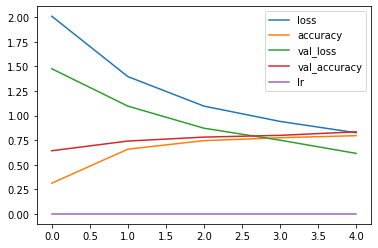

In [18]:
pd.DataFrame(history.history).plot()

#Fine Tune

In [19]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [21]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [22]:
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_tune = model.fit(train_dataset,
                              epochs=fine_tune_epochs,
                              validation_data=test_dataset,
                              initial_epoch=history.epoch[-1], # start from previous last epoch
                              validation_steps=int(0.1 * len(test_dataset)),
                              callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True),
                                         tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, verbose=1)]) 

Epoch 5/10
24/24 [==============================] - 12s 205ms/step - loss: 0.8758 - accuracy: 0.7533 - val_loss: 0.6033 - val_accuracy: 0.8170 - lr: 1.0000e-04
Epoch 6/10
24/24 [==============================] - 4s 165ms/step - loss: 0.7504 - accuracy: 0.7920 - val_loss: 0.6713 - val_accuracy: 0.8080 - lr: 1.0000e-04
Epoch 7/10
24/24 [==============================] - 4s 152ms/step - loss: 0.6670 - accuracy: 0.8267 - val_loss: 0.5456 - val_accuracy: 0.8214 - lr: 1.0000e-04
Epoch 8/10
24/24 [==============================] - 4s 140ms/step - loss: 0.5907 - accuracy: 0.8453 - val_loss: 0.5056 - val_accuracy: 0.8393 - lr: 1.0000e-04
Epoch 9/10
24/24 [==============================] - 4s 156ms/step - loss: 0.5584 - accuracy: 0.8573 - val_loss: 0.4895 - val_accuracy: 0.8438 - lr: 1.0000e-04
Epoch 10/10
24/24 [==============================] - 4s 130ms/step - loss: 0.5336 - accuracy: 0.8653 - val_loss: 0.5277 - val_accuracy: 0.8214 - lr: 1.0000e-04


In [23]:
model.evaluate(test_dataset)

79/79 [==============================] - 5s 62ms/step - loss: 0.5014 - accuracy: 0.8444


[0.5014473795890808, 0.8443999886512756]

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 906,042
Non-trainable params: 3,156,339
_________________________________________________________________


In [25]:
def plot_fine_turn_loss(original_history, new_history, initial_epochs): 
  loss = original_history.history["loss"] + new_history.history["loss"]
  val_loss = original_history.history["val_loss"] + new_history.history["val_loss"]
  accuracy = original_history.history["accuracy"] + new_history.history["accuracy"]
  val_accuracy = original_history.history["val_accuracy"] + new_history.history["val_accuracy"]
  plt.figure(figsize=(10, 7))
  plt.subplot(2, 1, 1)
  plt.plot(loss, label="loss")
  plt.plot(val_loss, label="val_loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tune")
  plt.legend()
  plt.subplot(2, 1, 2)
  plt.plot(accuracy, label="accuracy")
  plt.plot(val_accuracy, label="val_accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tune")
  plt.legend()

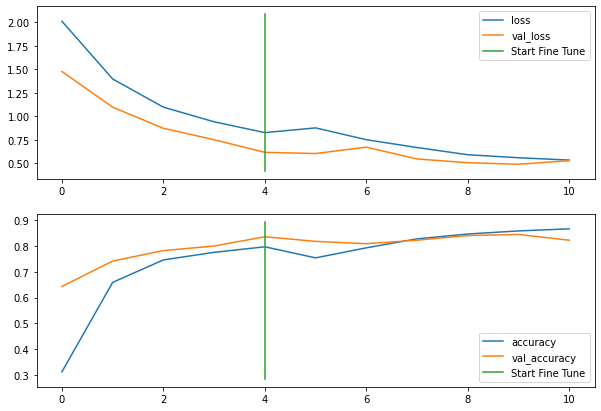

In [26]:
plot_fine_turn_loss(history,
                    history_fine_tune,
                    5)